In [1]:
#Import dependencies

import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn import linear_model
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Load the raw data in

data_file=("Most-Recent-Cohorts-All-Data-Elements.csv")
total_data_df=pd.read_csv(data_file, low_memory=False)
regression_df=total_data_df

In [3]:
#Extract columns to be used in the regression analysis

regression_subset_df=total_data_df
regression_subset_df=regression_subset_df[['REGION', 'CONTROL', 'ADM_RATE', 'SAT_AVG', 'MN_EARN_WNE_P10', 'MN_EARN_WNE_P6', 'MN_EARN_WNE_P8', 'MD_EARN_WNE_P10','MD_EARN_WNE_P8','MD_EARN_WNE_P6', 'PCIP11', 'PCIP14','PCIP15','PCIP27']]
regression_subset_df.head()

,REGION,CONTROL,ADM_RATE,SAT_AVG,MN_EARN_WNE_P10,MN_EARN_WNE_P6,MN_EARN_WNE_P8,MD_EARN_WNE_P10,MD_EARN_WNE_P8,MD_EARN_WNE_P6,PCIP11,PCIP14,PCIP15,PCIP27
0,5,1,0.9027,929.0,35500,28400,30600,31000,27100,25200,0.0353,0.0751,0.0287,0.0000
1,5,1,0.9181,1195.0,48400,39400,44100,41200,38300,35100,0.0141,0.0698,0.0000,0.0112
2,5,2,NaN,NaN,47600,35400,40800,39600,38300,30700,0.0000,0.0000,0.0000,0.0000
3,5,1,0.8123,1322.0,52000,40300,45900,46700,41800,36200,0.0755,0.2918,0.0000,0.0142
4,5,1,0.9787,935.0,30600,24400,27500,27700,25200,22600,0.0565,0.0000,0.0000,0.0175


In [4]:
#Add new column totalling all relevant percentages of STEM subjects into new column in the dataframe

regression_subset_df["Stem Degree Total"]=regression_subset_df["PCIP11"]+regression_subset_df["PCIP14"]+regression_subset_df["PCIP15"]+regression_subset_df["PCIP27"]
regression_subset_df.head()

,REGION,CONTROL,ADM_RATE,SAT_AVG,MN_EARN_WNE_P10,MN_EARN_WNE_P6,MN_EARN_WNE_P8,MD_EARN_WNE_P10,MD_EARN_WNE_P8,MD_EARN_WNE_P6,PCIP11,PCIP14,PCIP15,PCIP27,Stem Degree Total
0,5,1,0.9027,929.0,35500,28400,30600,31000,27100,25200,0.0353,0.0751,0.0287,0.0000,0.1391
1,5,1,0.9181,1195.0,48400,39400,44100,41200,38300,35100,0.0141,0.0698,0.0000,0.0112,0.0951
2,5,2,NaN,NaN,47600,35400,40800,39600,38300,30700,0.0000,0.0000,0.0000,0.0000,0.0000
3,5,1,0.8123,1322.0,52000,40300,45900,46700,41800,36200,0.0755,0.2918,0.0000,0.0142,0.3815
4,5,1,0.9787,935.0,30600,24400,27500,27700,25200,22600,0.0565,0.0000,0.0000,0.0175,0.0740


In [5]:
#Importing file clean of all non-numeric data from Excel

regression_clean_df=pd.read_csv("regression_clean_v2.csv")
regression_clean_df.head()

,Region,Institution Ownership Type,Admission Rate,Avg SAT Score,STEM Degree Total,Mean 10yr Earnings Post Graduation,Mean 6 yr Earnings Post Graduation,Mean 8yr Earnings Post Graduation,Median 10yr Earnings Post Graduation,Median 8yr Earnings Post Graduation,Median 6yr Earnings Post Graduation
0,5,1,0.9027,929,0.1391,35500,28400,30600,31000,27100,25200
1,5,1,0.9181,1195,0.0951,48400,39400,44100,41200,38300,35100
2,5,1,0.8123,1322,0.3815,52000,40300,45900,46700,41800,36200
3,5,1,0.9787,935,0.0740,30600,24400,27500,27700,25200,22600
4,5,1,0.5330,1278,0.1259,51600,42400,45600,44500,40300,37400


Text(0, 0.5, 'Log of Mean Annual Earnings after 6 years')

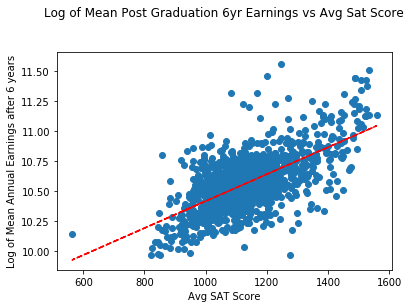

In [18]:

#Looking at the key individual independent elements(Admission Rate, Avg SAT Score and Proportion of STEM Courses (STEM Degree Total) 
#charted against the natural log of the dependent variable to check for linearity

Y=np.log(regression_clean_df['Mean 6 yr Earnings Post Graduation'])
X=regression_clean_df['Avg SAT Score']

plt.scatter(X,Y)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.title("Log of Mean Post Graduation 6yr Earnings vs Avg Sat Score\n\n")
plt.xlabel("Avg SAT Score")
plt.ylabel("Log of Mean Annual Earnings after 6 years")




Text(0, 0.5, 'Log of Mean Annual Earnings after 10 years')

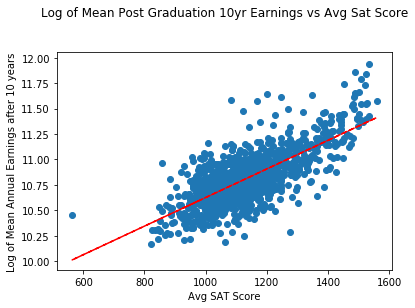

In [7]:
Y=np.log(regression_clean_df['Mean 10yr Earnings Post Graduation'])
X=regression_clean_df['Avg SAT Score']

plt.scatter(X,Y)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.title("Log of Mean Post Graduation 10yr Earnings vs Avg Sat Score\n\n")
plt.xlabel("Avg SAT Score")
plt.ylabel("Log of Mean Annual Earnings after 10 years")


Text(0, 0.5, 'Log of Mean Annual Earnings after 6 years')

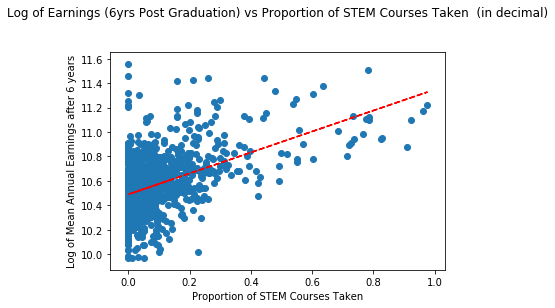

In [8]:
Y=np.log(regression_clean_df['Mean 6 yr Earnings Post Graduation'])
X=regression_clean_df['STEM Degree Total']

plt.scatter(X,Y)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.title("Log of Earnings (6yrs Post Graduation) vs Proportion of STEM Courses Taken  (in decimal)\n\n")
plt.xlabel("Proportion of STEM Courses Taken")
plt.ylabel("Log of Mean Annual Earnings after 6 years")

Text(0, 0.5, 'Log of Mean Annual Earnings after 10 years')

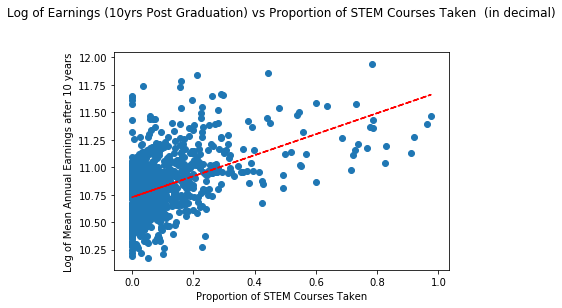

In [9]:
Y=np.log(regression_clean_df['Mean 10yr Earnings Post Graduation'])
X=regression_clean_df['STEM Degree Total']

plt.scatter(X,Y)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.title("Log of Earnings (10yrs Post Graduation) vs Proportion of STEM Courses Taken  (in decimal)\n\n")
plt.xlabel("Proportion of STEM Courses Taken")
plt.ylabel("Log of Mean Annual Earnings after 10 years")

Text(0, 0.5, 'Log of Mean Annual Earnings after 6 years')

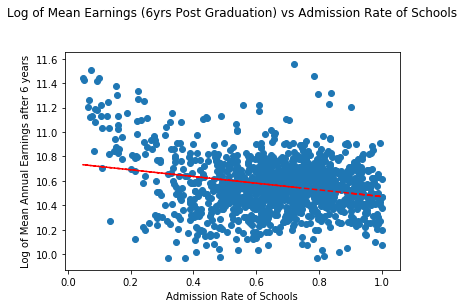

In [10]:

Y=np.log(regression_clean_df['Mean 6 yr Earnings Post Graduation'])
X=regression_clean_df['Admission Rate']

plt.scatter(X,Y)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.title("Log of Mean Earnings (6yrs Post Graduation) vs Admission Rate of Schools\n\n")
plt.xlabel("Admission Rate of Schools")
plt.ylabel("Log of Mean Annual Earnings after 6 years")
    


Text(0, 0.5, 'Log of Mean Annual Earnings after 10 years')

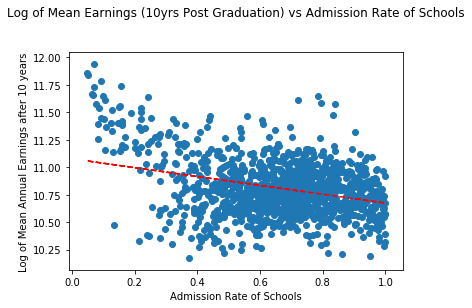

In [11]:
Y=np.log(regression_clean_df['Mean 10yr Earnings Post Graduation'])
X=regression_clean_df['Admission Rate']

plt.scatter(X,Y)
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
plt.plot(X,p(X),"r--")
plt.title("Log of Mean Earnings (10yrs Post Graduation) vs Admission Rate of Schools\n\n")
plt.xlabel("Admission Rate of Schools")
plt.ylabel("Log of Mean Annual Earnings after 10 years")

In [12]:
#Calculating the regression coefficients for earnings 10yrs post graduation

X=regression_clean_df[['Region', 'Institution Ownership Type', 'Admission Rate','Avg SAT Score','STEM Degree Total']]
Y=regression_clean_df['Mean 10yr Earnings Post Graduation']

regr=linear_model.LinearRegression()
regr.fit(X,Y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#Setting up the train and test subsets of the data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=42)

In [14]:
#Calculating and fitting the regression data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Calculating the regression data and predictions

predicted = regression_model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)


X=sm.add_constant(X)
mod=sm.OLS(Y, X)
fii=mod.fit()

#Showing the putput of the regression with the coefficients and the significance of each coefficient

fii.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                OLS                                Adj. R-squared:     0.589     
Dependent Variable:   Mean 10yr Earnings Post Graduation AIC:                26886.0233
Date:                 2019-10-30 14:19                   BIC:                26916.9134
No. Observations:     1272                               Log-Likelihood:     -13437.   
Df Model:             5                                  F-statistic:        365.6     
Df Residuals:         1266                               Prob (F-statistic): 1.16e-242 
R-squared:            0.591                              Scale:              8.8122e+07
---------------------------------------------------------------------------------------
                              Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------------
const                      -18980.7781 3373.1107 -5.6271 0.0000 -25598.2802 -12363.2761
Region                       -646.2174  137.0806 -4.7141 0.0000   -915.1475   -377.2873
Institution Ownership Type   1928.5687  563.2144  3.4242 0.0006    823.6324   3033.5051
Admission Rate              -7334.5821 1474.7342 -4.9735 0.0000 -10227.7740  -4441.3901
Avg SAT Score                  63.6216    2.4489 25.9798 0.0000     58.8173     68.4260
STEM Degree Total           30461.2141 2379.6730 12.8006 0.0000  25792.6774  35129.7508
---------------------------------------------------------------------------------------
Omnibus:                     488.406             Durbin-Watson:                1.654   
Prob(Omnibus):               0.000               Jarque-Bera (JB):             3157.749
Skew:                        1.638               Prob(JB):                     0.000   
Kurtosis:                    9.989               Condition No.:                15390   
=======================================================================================
* The condition number is large (2e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

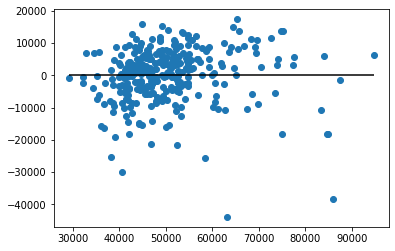

In [17]:
#Plotting the data points to show how much the predicted points vary from the actual data

plt.scatter(predicted, predicted - y_test)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()